In [24]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [4]:
#we will plot number of keywords found on x axis
#we will plot number of matches from the global values on y axis
openfile = open('/home/manan/Desktop/Research/Learning-Perspectives/results/scores.txt')
readfile = openfile.readlines()

## initialize with values from the teachers notes

X = np.array([[1.72e+69,0]])

for i in readfile:
    a,b,c = i.split(' ')
    if int(a)>int(c):
     print("error")
    if(int(c)>0):
     X = np.append(X,[[float(b),0]],axis=0)

print(X)

[[1.72000000e+69 0.00000000e+00]
 [1.72627909e+69 0.00000000e+00]
 [8.42499137e+65 0.00000000e+00]
 [1.72627909e+69 0.00000000e+00]
 [1.85146612e+69 0.00000000e+00]
 [1.85146612e+69 0.00000000e+00]
 [1.72964908e+69 0.00000000e+00]
 [8.42498333e+65 0.00000000e+00]
 [8.42498333e+65 0.00000000e+00]
 [1.72627909e+69 0.00000000e+00]
 [8.42601177e+65 0.00000000e+00]
 [1.72627909e+69 0.00000000e+00]
 [8.42498333e+65 0.00000000e+00]
 [8.43321087e+65 0.00000000e+00]
 [2.15763823e+69 0.00000000e+00]
 [1.73975906e+69 0.00000000e+00]
 [8.42498333e+65 0.00000000e+00]
 [8.42498333e+65 0.00000000e+00]
 [8.42499137e+65 0.00000000e+00]
 [8.95155283e+65 0.00000000e+00]
 [8.42499138e+65 0.00000000e+00]
 [8.42498333e+65 0.00000000e+00]
 [8.42498333e+65 0.00000000e+00]
 [8.42498333e+65 0.00000000e+00]
 [4.32201646e+68 0.00000000e+00]
 [1.72627909e+69 0.00000000e+00]
 [1.72627909e+69 0.00000000e+00]
 [4.32201645e+68 0.00000000e+00]
 [8.42499149e+65 0.00000000e+00]
 [2.15763823e+69 0.00000000e+00]
 [8.424991

In [31]:
df = pd.DataFrame(data=X)
df.info()
df.columns=["score","dummy"]
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       89 non-null     float64
 1   1       89 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


,score,dummy
0,1.720000e+69,0.0
1,1.726279e+69,0.0
2,8.424991e+65,0.0
3,1.726279e+69,0.0
4,1.851466e+69,0.0


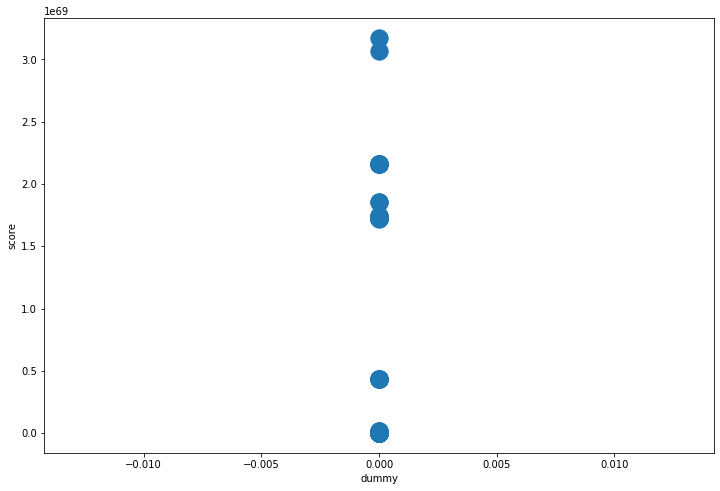

In [43]:
df.plot.scatter(y='score',x='dummy', figsize=(12,8),style="s",s=300)

In [51]:
## apply K means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
## cluster centres
print(kmeans.cluster_centers_)


[[5.14843125e+67 0.00000000e+00]
 [1.80865594e+69 0.00000000e+00]
 [3.11882269e+69 0.00000000e+00]]


In [53]:
## labelled data (which data is in which cluster)
print(kmeans.labels_)

[1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 2 0 1
 0 0 1 0 0 1 0 0 0 1 2 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1]


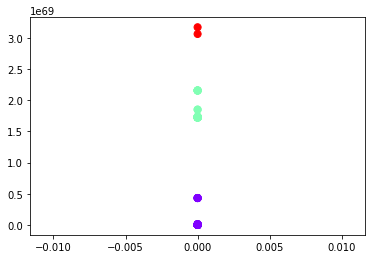

In [54]:
## plot the devided map using colors!
plt.scatter(X[:,1],X[:,0], c=kmeans.labels_,cmap='rainbow',s=50)
